<a href="https://colab.research.google.com/github/denisshaf/DSPractice/blob/DS-1.1/DQC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Practice DS 1.1] DQC and ETL

In [2]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats, special

## MyDrive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ln -s '/content/drive/MyDrive' 'MyDrive'

## Download data

In [5]:
!pip install -q kaggle

In [6]:
! mkdir ~/.kaggle
! cp MyDrive/kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle competitions download -c competitive-data-science-predict-future-sales

 99% 15.0M/15.1M [00:01<00:00, 19.1MB/s]
100% 15.1M/15.1M [00:01<00:00, 14.3MB/s]


In [9]:
!unzip competitive-data-science-predict-future-sales -d data

Archive:  competitive-data-science-predict-future-sales.zip
  inflating: data/item_categories.csv  
  inflating: data/items.csv          
  inflating: data/sales_train.csv    
  inflating: data/sample_submission.csv  
  inflating: data/shops.csv          
  inflating: data/test.csv           


In [10]:
data = {}
for file in os.listdir('./data'):
  data[file[:-4]] = pd.read_csv(f'./data/{file}')

In [11]:
for name, df in data.items():
  print(name)
  display(df.describe())
  print()

items


,item_id,item_category_id
count,22170.00000,22170.000000
mean,11084.50000,46.290753
std,6400.07207,15.941486
min,0.00000,0.000000
25%,5542.25000,37.000000
50%,11084.50000,40.000000
75%,16626.75000,58.000000
max,22169.00000,83.000000



shops


,shop_id
count,60.000000
mean,29.500000
std,17.464249
min,0.000000
25%,14.750000
50%,29.500000
75%,44.250000
max,59.000000



item_categories


,item_category_id
count,84.000000
mean,41.500000
std,24.392622
min,0.000000
25%,20.750000
50%,41.500000
75%,62.250000
max,83.000000



sample_submission


,ID,item_cnt_month
count,214200.000000,214200.0
mean,107099.500000,0.5
std,61834.358168,0.0
min,0.000000,0.5
25%,53549.750000,0.5
50%,107099.500000,0.5
75%,160649.250000,0.5
max,214199.000000,0.5



test


,ID,shop_id,item_id
count,214200.000000,214200.000000,214200.000000
mean,107099.500000,31.642857,11019.398627
std,61834.358168,17.561933,6252.644590
min,0.000000,2.000000,30.000000
25%,53549.750000,16.000000,5381.500000
50%,107099.500000,34.500000,11203.000000
75%,160649.250000,47.000000,16071.500000
max,214199.000000,59.000000,22167.000000



sales_train


,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


## Explore data

### File descriptions

- sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
- test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
- sample_submission.csv - a sample submission file in the correct format.
- items.csv - supplemental information about the items/products.
- item_categories.csv  - supplemental information about the items categories.
- shops.csv- supplemental information about the shops.

### Data fields

- ID - an Id that represents a (Shop, Item) tuple within the test set
- shop_id - unique identifier of a shop
- item_id - unique identifier of a product
- item_category_id - unique identifier of item category
- item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
- item_price - current price of an item
- date - date in format dd/mm/yyyy
- date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
- item_name - name of item
- shop_name - name of shop
- item_category_name - name of item category

### Show all data

In [ ]:
data['item_categories'].sample(10)

,item_category_name,item_category_id
14,Игровые консоли - PSVita,14
3,Аксессуары - PS4,3
73,Программы - 1С:Предприятие 8,73
76,Программы - Для дома и офиса (Цифра),76
18,Игры - PS2,18
23,Игры - XBOX 360,23
16,Игровые консоли - XBOX ONE,16
30,Игры PC - Стандартные издания,30
56,Музыка - CD фирменного производства,56
24,Игры - XBOX ONE,24


In [ ]:
data['items'].sample(10)

,item_name,item_id,item_category_id
12060,ИСТОРИЯ ДЕЛЬФИНА 2 (BD),12060,37
20359,"Фигурка Aliens Classic Warrior 7""",20359,72
14462,МАША И МЕДВЕДЬ: С Новым Годом! DVD+Открытка (В...,14462,40
11814,"Завтра война (Steam версия) [PC, Цифровая версия]",11814,31
2326,Call of Duty: Black Ops III. Nuketown Edition ...,2326,30
9232,Белянин Андрей Хватай Иловайского! (mp3-CD) (...,9232,43
12091,ИСЧЕЗНУВШАЯ (BD),12091,37
3940,"Inversion (СофтКлаб) [PC, Цифровая версия]",3940,31
12631,"КОЖА, В КОТОРОЙ Я ЖИВУ (BD)",12631,37
2319,Call of Duty: Black Ops II. Коллекционное изда...,2319,28


In [ ]:
data['sales_train'].head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [ ]:
data['sample_submission'].sample(10)

,ID,item_cnt_month
156470,156470,0.5
24539,24539,0.5
32657,32657,0.5
73570,73570,0.5
29127,29127,0.5
171221,171221,0.5
132937,132937,0.5
123667,123667,0.5
60349,60349,0.5
46721,46721,0.5


In [ ]:
data['shops'].head(10)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [ ]:
data['test'].sample(10)

,ID,shop_id,item_id
17017,17017,3,701
14121,14121,6,3460
92314,92314,14,1413
118087,118087,53,13300
90545,90545,18,14846
75162,75162,21,14552
57629,57629,25,14075
6479,6479,4,20041
151753,151753,59,20903
48587,48587,31,18835


In [ ]:
data['shops'][data['shops']['shop_name'].apply(np.char.startswith, args=('!',))]

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1


### Duplicates

In [11]:
for name, data_set in data.items():
  is_duplicated = data_set.duplicated(keep=False)
  if is_duplicated.any():
    print(name)
    display(data_set[is_duplicated])

sales_train


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76961,05.01.2013,0,54,20130,149.0,1.0
76962,05.01.2013,0,54,20130,149.0,1.0
1435365,23.02.2014,13,50,3423,999.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496765,23.03.2014,14,21,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671872,01.05.2014,16,50,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866322,12.07.2014,18,25,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0


As `item_cnt_day` is a number of sales per day, then one shop can not have more than one records of `item_cnt_day` on the same date. So these duplicatets are data noise indeed and we should delete them.

In [12]:
data['sales_train'].drop_duplicates(inplace=True)

### Negative values

In [13]:
display(data['sales_train'][data['sales_train']['item_cnt_day'] <= 0]['item_cnt_day'].unique())
display(data['sales_train'][data['sales_train']['item_price'] <= 0]['item_price'].unique())

array([ -1.,  -5.,  -6.,  -3.,  -2.,  -4., -22., -16.,  -9.])

array([-1.])

As I found out from Discussion at Kaggle, negative values in `item_cnt_day` mean that some items were returned, so they are normal data.

But the negative values in `item_price` are data noise, so we should delete them.

In [14]:
data['sales_train'].drop(data['sales_train'][data['sales_train']['item_price'] <= 0].index, inplace=True)

### Floats in item_cnt

In [17]:
frac_len = len(data['sales_train'][~data['sales_train']['item_cnt_day'].apply(float.is_integer)])
print(f'Number of fractional values in `item_cnt_day`: {frac_len}')

Number of fractional values in `item_cnt_day`: 0


Though fractional number of sales is logically incorrect, it can be OK to predict fractional values, becaluse the metric is RMSE.
https://www.kaggle.com/competitions/competitive-data-science-predict-future-sales/discussion/168349

Though if I wanted to predict positive integers, I could use Poisson regression. Though it turned out the target can be negative, so it doesn't really fit here.

### Missing values

In [18]:
for name, df in data.items():
  print(name)
  df.info()
  print()

items
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB

shops
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

item_categories
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    8

There is no missing values in data.

### Outliers

The only numerical values are `item_price` и `item_cnt_day`, so there might be outliers there.

In [19]:
data_length = len(data['sales_train'])
data_length

2935842

Let's search for the outliers using inter quantile distance.

In [20]:
len(data['sales_train'])

2935842

#### `item_price`

##### Untransformed values

<Axes: xlabel='item_price', ylabel='Count'>

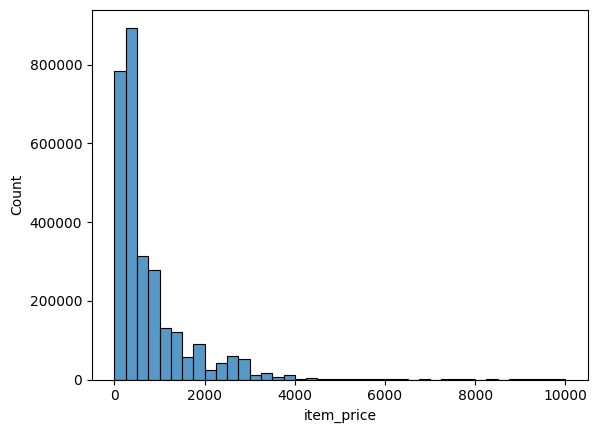

In [ ]:
sns.histplot(data['sales_train']['item_price'][data['sales_train']['item_price'] < 10000], bins=40)

<Axes: xlabel='item_price'>

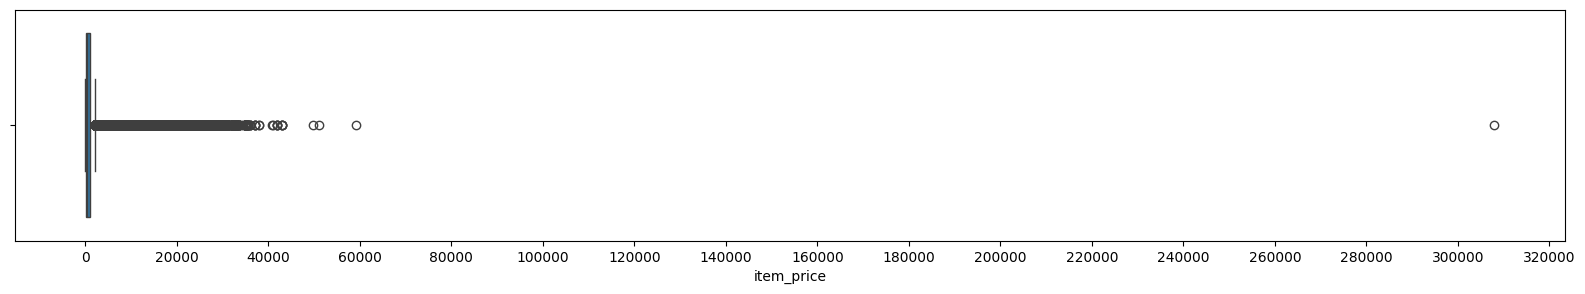

In [28]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.set_xticks(list(range(0, 350_000, 20_000)))
sns.boxplot(data['sales_train']['item_price'], orient='h')

In [ ]:
q25, q75 = np.quantile(data['sales_train']['item_price'], [.25, .75])
iqd = q75 - q25

outliers = data['sales_train']['item_price'][(data['sales_train']['item_price'] < (q25 - 1.5 * iqd)) |
                                             (data['sales_train']['item_price'] > (q75 + 1.5 * iqd))]
print(f'Boundaries of the segment: {q25 - 1.5 * iqd, q75 + 1.5 * iqd}')
print(f'Number of outliers: {len(outliers)}')
print(f'Per cent of outliers: {len(outliers) / data_length}')

Boundaries of the segment: (-876.0, 2124.0)
Number of outliers: 258942
Per cent of outliers: 0.08820025055844286


First, it's obviously non normal distribution, it's highly skewed, so IQD might not show real outliers.

Obvious outliers are the prices higher than 40000.

##### Box-Cox transformation

In [31]:
boxcox_transformed, lambda_ = stats.boxcox(data['sales_train']['item_price'])
q25, q75 = np.quantile(boxcox_transformed, [.25, .75])
iqd = q75 - q25

outliers = boxcox_transformed[#(boxcox_transformed < (q25 - 1.5 * iqd)) |
                              (boxcox_transformed > (q75 + 1.5 * iqd))]
borders = special.inv_boxcox([q25 - 1.5 * iqd, q75 + 1.5 * iqd], lambda_)

print(f'Boundaries of the segment: {borders[0], borders[1]}')
print(f'Number of outliers: {len(outliers)}')
print(f'Per cent of outliers: {len(outliers) / data_length}')

Boundaries of the segment: (20.111634025974027, 5951.247159958458)
Number of outliers: 30169
Per cent of outliers: 0.010276097964399992


<Axes: ylabel='Count'>

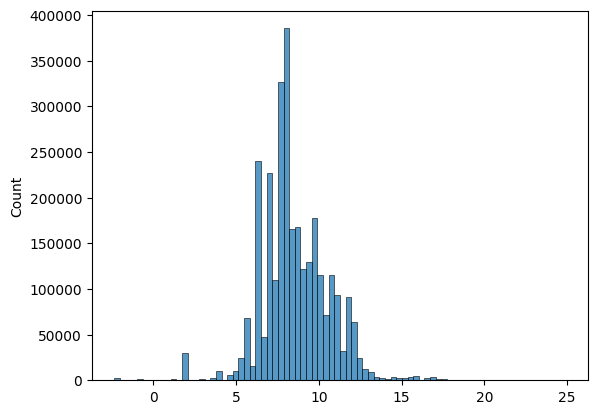

In [ ]:
sns.histplot(boxcox_transformed, bins=80)

<Axes: >

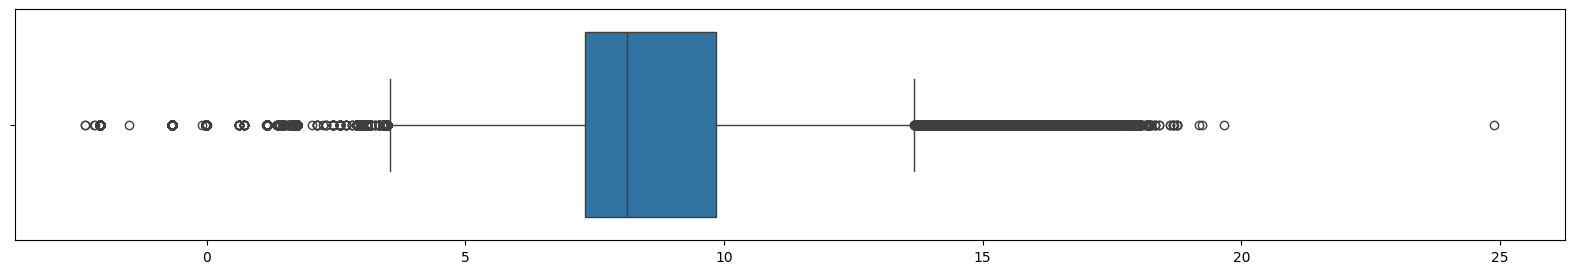

In [32]:
fig, ax = plt.subplots(figsize=(20, 3))
sns.boxplot(boxcox_transformed, orient='h')

##### `sqrt`

In [33]:
sqrt_transformed = data['sales_train']['item_price'].apply(np.sqrt)
q25, q75 = np.quantile(sqrt_transformed, [.25, .75])
iqd = q75 - q25

outliers = sqrt_transformed[(sqrt_transformed < (q25 - 1.5 * iqd)) |
                            (sqrt_transformed > (q75 + 1.5 * iqd))]

borders = q25 - 1.5 * iqd, q75 + 1.5 * iqd
print(f'Boundaries of the segment (sqrt values): {borders}')
print(f'Boundaries of the segment: {0, np.square(borders[1])}')
print(f'Number of outliers: {len(outliers)}')
print(f'Per cent of outliers: {len(outliers) / data_length}')

Boundaries of the segment (sqrt values): (-7.961107292688574, 55.34780238930629)
Boundaries of the segment: (0, 3063.379229325699)
Number of outliers: 90517
Per cent of outliers: 0.03083170007105287


<Axes: xlabel='item_price', ylabel='Count'>

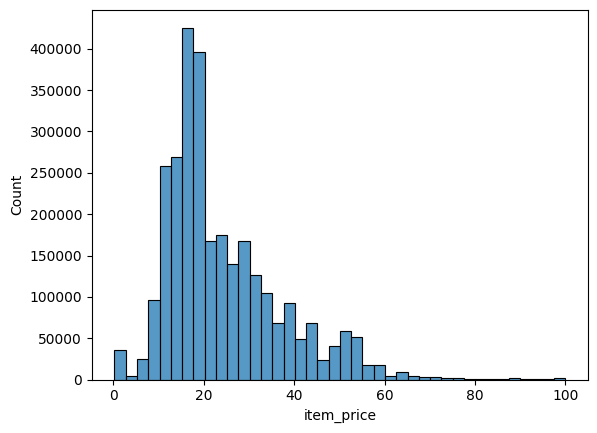

In [ ]:
sns.histplot(sqrt_transformed[sqrt_transformed < 100], bins=40)

<Axes: xlabel='item_price'>

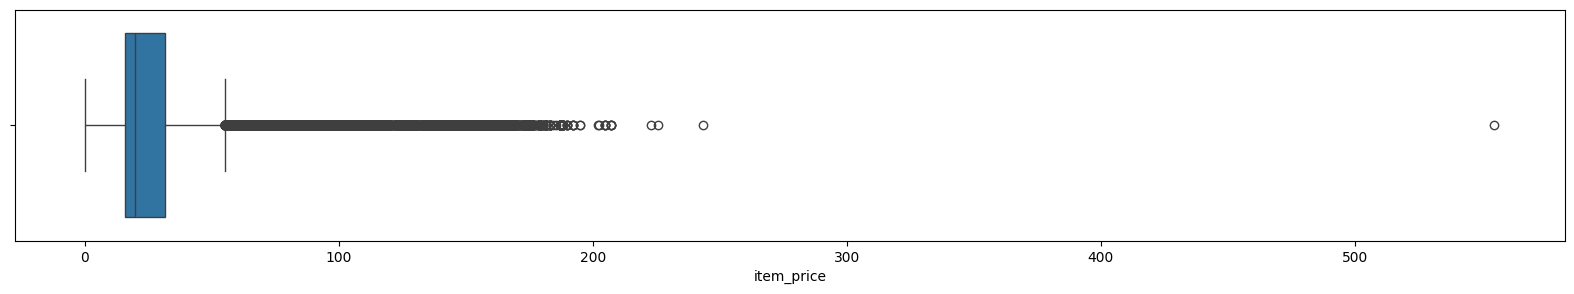

In [34]:
fig, ax = plt.subplots(figsize=(20, 3))
sns.boxplot(sqrt_transformed, orient='h')

After all, I decided to trow away prices higher than 40000.

In [37]:
data['sales_train'].drop((data['sales_train'][data['sales_train']['item_price'] > 40_000]).index,
                         inplace=True)

#### `item_cnt_day`

In [ ]:
data['sales_train']['item_cnt_day'].value_counts()[data['sales_train']['item_cnt_day'].value_counts() > 100]

1     2629371
2      194201
3       47350
4       19685
5       10474
6        6338
7        4057
8        2903
9        2177
10       1820
11       1263
12       1083
13        918
14        716
15        638
16        544
17        438
18        391
20        364
19        347
21        290
22        242
24        204
23        198
25        180
26        176
30        147
28        131
27        130
31        123
32        106
29        102
Name: item_cnt_day, dtype: int64

<Axes: xlabel='item_cnt_day', ylabel='Count'>

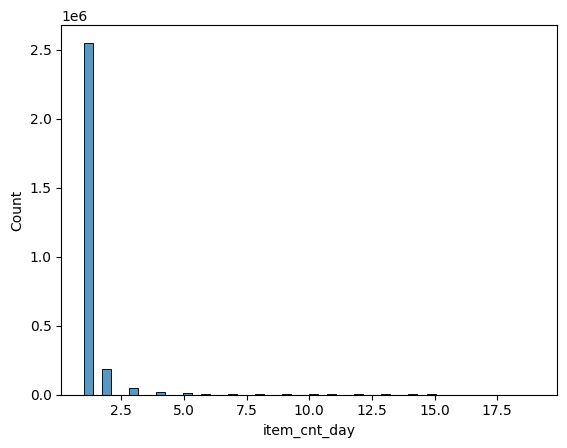

In [ ]:
sns.histplot(data['sales_train']['item_cnt_day'][data['sales_train']['item_cnt_day'] < 20], bins=50)

<Axes: xlabel='item_cnt_day'>

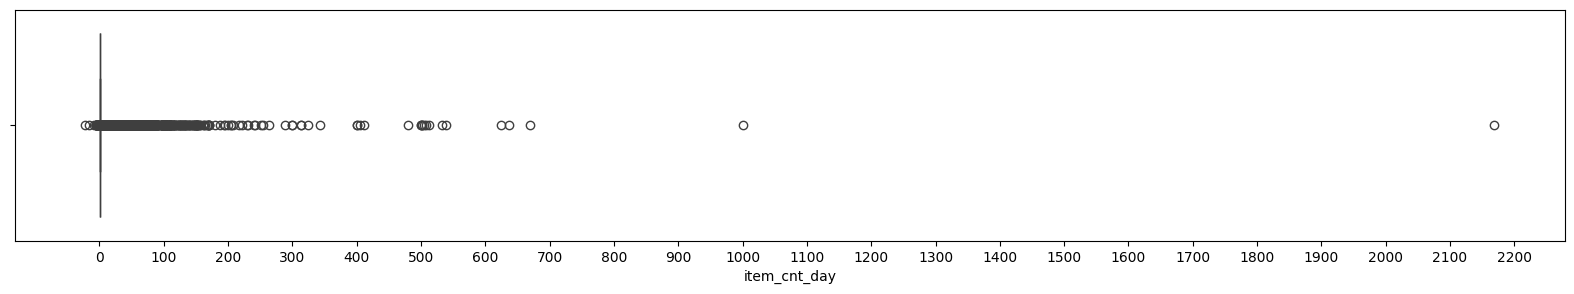

In [39]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.set_xticks(list(range(0, 3000, 100)))
sns.boxplot(data['sales_train']['item_cnt_day'], orient='h')

Let's see items sold more than 600 a day.

In [43]:
data['sales_train'][data['sales_train']['item_cnt_day'] >= 600].merge(data['items']).merge(data['shops'])

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name
0,15.01.2015,24,12,20949,4.000000,1000.0,Фирменный пакет майка 1С Интерес белый (34*42)...,71,Интернет-магазин ЧС
1,14.04.2015,27,12,3731,1904.548077,624.0,"Grand Theft Auto V [PC, русские субтитры]",30,Интернет-магазин ЧС
2,30.09.2015,32,12,9248,1692.526158,669.0,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) [...",80,Интернет-магазин ЧС
3,28.10.2015,33,12,11373,0.908714,2169.0,Доставка до пункта выдачи (Boxberry),9,Интернет-магазин ЧС
4,30.09.2015,32,55,9249,1702.825746,637.0,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) У...",8,Цифровой склад 1С-Онлайн


We see that two best-selling items are plastic bag and delivery. They are quite specific because people by something and also buy a plastic bag and delivery, so they aren't really items that people want to buy.

So let's delete plastic bag and delivery.

In [44]:
data['sales_train'].drop(data['sales_train'][data['sales_train']['item_cnt_day'] > 1000].index,
                         inplace=True)

### Join tables

In [45]:
items = data['items'].merge(data['item_categories'], how='outer')
merged_data = items.merge(data['sales_train'], how='outer').merge(data['shops'])
merged_data = merged_data.drop(['item_id', 'item_category_id', 'shop_id'], axis=1)

In [46]:
merged_data

,item_name,item_category_name,date,date_block_num,item_price,item_cnt_day,shop_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,Кино - DVD,01.09.2014,20.0,58.0,1.0,"Химки ТЦ ""Мега"""
1,***В ЛУЧАХ СЛАВЫ (UNV) D,Кино - DVD,24.08.2014,19.0,58.0,1.0,"Химки ТЦ ""Мега"""
2,***В ЛУЧАХ СЛАВЫ (UNV) D,Кино - DVD,12.11.2014,22.0,58.0,1.0,"Химки ТЦ ""Мега"""
3,***ГОЛУБАЯ ВОЛНА (Univ) D,Кино - DVD,05.07.2014,18.0,100.0,1.0,"Химки ТЦ ""Мега"""
4,***ГОЛУБАЯ ВОЛНА (Univ) D,Кино - DVD,26.08.2014,19.0,58.0,1.0,"Химки ТЦ ""Мега"""
...,...,...,...,...,...,...,...
2935822,Манга Врата Штейна Том 1,"Книги - Комиксы, манга",01.10.2015,33.0,299.0,5.0,"Москва ""Распродажа"""
2935823,Манга Врата Штейна Том 1,"Книги - Комиксы, манга",02.10.2015,33.0,299.0,31.0,"Москва ""Распродажа"""
2935824,Манга Врата Штейна Том 1,"Книги - Комиксы, манга",03.10.2015,33.0,299.0,14.0,"Москва ""Распродажа"""
2935825,Элемент питания DURACELL LR06-BC2,Элементы питания,01.10.2015,33.0,119.0,1.0,"Москва ""Распродажа"""
